In [40]:
import numpy as np
from sklearn.cluster import DBSCAN
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

from SelfOrganizingMap import SelfOrganizingMap
from HexagonalGraph import HexagonalGraph, visualize_graph

In [41]:
# function to rescale data
def min_max_scaling_2d(data, new_min=0, new_max=1):
    # Transpose the data to work with each feature separately
    data_transposed = list(map(list, zip(*data)))

    # Apply min-max scaling to each feature
    scaled_data = [
        [
            ((x - min(feature)) / (max(feature) - min(feature))) * (new_max - new_min) + new_min
            for x in feature
        ]
        for feature in data_transposed
    ]

    # Transpose the result back to the original orientation
    scaled_data_transposed = list(map(list, zip(*scaled_data)))

    return np.array(scaled_data_transposed)

# Function to create a new graph based on weights from the Self-Organizing Map
def create_graph_from_weights(original_graph, weights):
    new_graph = nx.Graph()
    node_mapping = {}  # Dictionary to map nodes from the original graph to the new graph

    # Add nodes to the new graph with corresponding positions from weights
    for node, weight in zip(original_graph.nodes, weights):
        new_graph.add_node(tuple(weight))
        node_mapping[node] = tuple(weight)

    # Add edges to the new graph (preserving relative edges from the original graph)
    for edge in original_graph.edges:
        new_graph.add_edge(node_mapping[edge[0]], node_mapping[edge[1]])

    return new_graph

In [42]:
import verde as vd
import matplotlib.pyplot as plt

data = vd.datasets.fetch_rio_magnetic()

fig = px.scatter(x=data.longitude, y=data.latitude, color=data.total_field_anomaly_nt, width=800, height=800)
fig.show()

C:\Users\Joel\AppData\Local\Temp/ipykernel_24440/2540461169.py:4: FutureWarning:

The Rio magnetic anomaly dataset is deprecated and will be removed in Verde v2.0.0. Use a different dataset instead.



In [43]:
scaler = MinMaxScaler(min=0, max=20)

xy = np.vstack((data.longitude, data.latitude)).T

xy = scaler.fit_transform(xy)

In [44]:
# Create a hexagonal graph for the Self-Organizing Map
grid_generator = HexagonalGraph(
    N_X=21, N_Y=21, 
    x_range=(np.min(xy[:, 0]), np.max(xy[:, 0])),
    y_range=(np.min(xy[:, 1]), np.max(xy[:, 1]))
)
hexagonal_graph = grid_generator.create_graph()

# Initialize and train a Self-Organizing Map
som = SelfOrganizingMap(2, hexagonal_graph)
som.fit(xy, 20)

Training:   0%|          | 0/20 [00:14<?, ?epoch/s]


KeyboardInterrupt: 

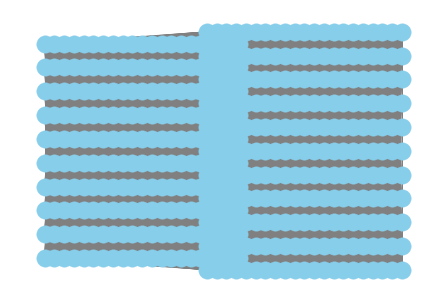

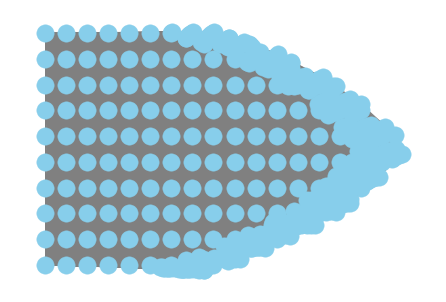

In [ ]:
# Create a new graph based on the weights of the Self-Organizing Map
topology = create_graph_from_weights(som.som_graph, weights=som.weights)

# Visualize the original and topology graphs
visualize_graph(som.som_graph)
visualize_graph(topology)

In [ ]:
# Generate synthetic data (iris dataset in this case)
blobs_data, blobs_label = datasets.make_blobs(3000, centers=3, n_features=2)

blobs_data = min_max_scaling_2d(blobs_data, 0, 20)

# Visualize the synthetic data using Plotly Express
fig = px.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], color=blobs_label.astype(str))
fig.show()

In [ ]:
# Create a hexagonal graph for the Self-Organizing Map
grid_generator = HexagonalGraph(
    N_X=21, N_Y=21, 
    x_range=(np.min(blobs_data[:, 0]), np.max(blobs_data[:, 0])),
    y_range=(np.min(blobs_data[:, 1]), np.max(blobs_data[:, 1]))
)
hexagonal_graph = grid_generator.create_graph()

# Initialize and train a Self-Organizing Map
som = SelfOrganizingMap(2, hexagonal_graph)
som.fit(blobs_data, 20)

Training: 100%|██████████| 20/20 [08:13<00:00, 24.68s/epoch]


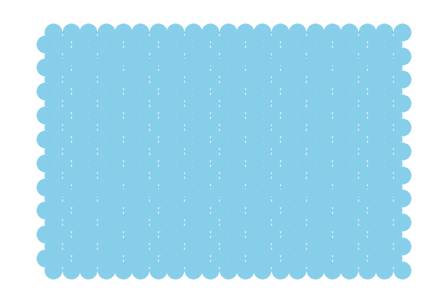

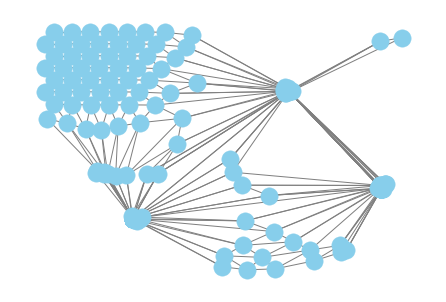

In [ ]:
# Create a new graph based on the weights of the Self-Organizing Map
topology = create_graph_from_weights(som.som_graph, weights=som.weights)

# Visualize the original and topology graphs
visualize_graph(som.som_graph)
visualize_graph(topology)

# Extract nodes from the topology graph
nodes = np.array(topology.nodes())
hex_nodes = np.array(som.som_graph.nodes)

# Perform DBSCAN clustering on the nodes
clustering = DBSCAN(eps=2, min_samples=2).fit(nodes)
preds = clustering.fit_predict(nodes)

In [ ]:
# Visualize the clustered hexagonal nodes
fig = px.scatter(x=hex_nodes[:, 0], y=hex_nodes[:, 1], color=preds.astype(str))
fig.show()

# Visualize the clustered nodes in the topology graph
fig = px.scatter(x=nodes[:, 0], y=nodes[:, 1], color=clustering.labels_.astype(str))
fig.show()

# Visualize the original synthetic data for reference
fig = px.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], color=blobs_label.astype(str))
fig.show()

In [ ]:
# Create a hexagonal graph for the Self-Organizing Map
grid_generator = HexagonalGraph(
    N_X=21, N_Y=21, 
    x_range=(np.min(blobs_data[:, 0]), np.max(blobs_data[:, 0])),
    y_range=(np.min(blobs_data[:, 1]), np.max(blobs_data[:, 1]))
)
hexagonal_graph = grid_generator.create_graph()

# Initialize and train a Self-Organizing Map
clf_som = SelfOrganizingMap(2, hexagonal_graph)
clf_som.fit(blobs_data, 20)